In this project we have chose two texts **T1** and **T2**, namely, **"The Hounds of Baskerville", by Sir Arthur Conan Doyle** and **"Pride and Prejudice", by Jane Austen** respectively, on which we perform **simple text pre-processing steps** and **tokenization**. We aim to analyze the frequency distribution of tokens in T1 and T2 separately, and represent them via pictorial means using the **word cloud**. Finally we evaluate the relationship between the word length and frequency for both T1 and T2.


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from urllib.request import urlopen
url1 = "http://gutenberg.org/files/2852/2852-0.txt"
url2 = "http://gutenberg.org/files/1342/1342-0.txt"
t1 = urlopen(url1).read()
t2 = urlopen(url2).read()


In [ ]:
print(type(t1))
len(t1)

<class 'bytes'>


388106

In [ ]:
print(type(t2))
len(t2)

<class 'bytes'>


799738

In [ ]:
t1[:100]

b"\xef\xbb\xbf\r\nProject Gutenberg's The Hound of the Baskervilles, by Arthur Conan Doyle\r\n\r\nThis eBook is for t"

In [ ]:
t2[:100]

b'\xef\xbb\xbf\r\nThe Project Gutenberg EBook of Pride and Prejudice, by Jane Austen\r\n\r\nThis eBook is for the use'

In [ ]:
rawbook1 = t1.decode('utf-8')
rawbook2 = t2.decode('utf-8')

In [ ]:
print(type(rawbook1))
print(type(rawbook2))

<class 'str'>
<class 'str'>


**Data Cleaning of text T1 and T2**


In [ ]:
rawbook1_line_list = rawbook1.splitlines()

In [ ]:
rawbook2_line_list = rawbook2.splitlines()

In the following code block we find out the line number from the start, where the extra text before the Chapter 1 of novel (**t1**) ends.
Similarly we find out the line number for **t1** where the last chapter of novel ends, so that extra unwanted text after that can be removed.

In [ ]:
start_index = 0
end_index = 0

for line in rawbook1_line_list[0:]:
  if line == "Chapter 1.":
     print(start_index)
  if line == "THE END":
     print(end_index)
     break
  start_index += 1
  end_index += 1



89
7370


As done above for t1, we do the same for **t2**, and find out **start_index**: the line where extra text before starting of Chapter 1 of novel ends, and **end_index**: the line where the last chapter of novel ends.

In [ ]:
start_index = 0;
end_index = 0;
for line in rawbook2_line_list[0:]:
  if line == "      Chapter 1":
     print(start_index)
  if line == "End of the Project Gutenberg EBook of Pride and Prejudice, by Jane Austen":
     print(end_index)
     break
  start_index += 1
  end_index +=1


167
14231




> **Data Cleaning of T1**



**Removing unwanted text and chapter headings for T1**





In the following code block we aim to make preparation for removing the headings "Chapter i." from text **T1** for every ith chapter.
For that we make a chapter_list conatining all the chapter names by using regular expression, as every chapter heading in the contents section follows a same pattern.

In [ ]:
import regex as re
chapter_list = []
pattern = r' Chapter [0-9][0-9]?'
for line in rawbook1_line_list[:88]:
   if bool(re.search(pattern, line)):
     line = re.sub("\t",".",line)
     temp_line = line[1:]
     chapter_list.append(temp_line)
print(chapter_list)



['Chapter 1.Mr. Sherlock Holmes', 'Chapter 2.The Curse of the Baskervilles', 'Chapter 3.The Problem', 'Chapter 4.Sir Henry Baskerville', 'Chapter 5.Three Broken Threads', 'Chapter 6.Baskerville Hall', 'Chapter 7.The Stapletons of Merripit House', 'Chapter 8.First Report of Dr. Watson', 'Chapter 9.The Light upon the Moor [Second Report of Dr. Watson]', 'Chapter 10.Extract from the Diary of Dr. Watson', 'Chapter 11.The Man on the Tor', 'Chapter 12.Death on the Moor', 'Chapter 13.Fixing the Nets', 'Chapter 14.The Hound of the Baskervilles', 'Chapter 15.A Retrospection']


In the following block of code we obtain **raw_list1**, which contains text of **t1** without the unwanted text i.e removal of running section, and then we convert the **list raw_list1 into string joined_book1** using join function, replacing all the tab spaces with the single space.

In [ ]:
raw_list1 = rawbook1_line_list[89:7369]
joined_book1 = ''.join(raw_list1)
joined_book1 = joined_book1.replace('      ',' ')
joined_book1

In the code block below we have used items of chapter_list (which contains all the chapter headings of **T1**) as a parameter for **sub()** function, to remove all the chapter headings from the joined_book1.

In [ ]:
for item in chapter_list:
  joined_book1 = re.sub(item,"",joined_book1)
joined_book1 = joined_book1[1:]
joined_book1



> **Data cleaning of T2**

**Removing unwanted text and chapter headings from text T2**



In the following code block we remove the unwanted text from **T2** and then convert the **list rawbook2_line_list into a string joined_book2** containing the required text of **T2** by using the **join()** function. And finally we further clean the text data by replacing tab spaces with single spaces using **replace()** function.

In [ ]:
raw_list2 = rawbook2_line_list[167:14227]
joined_book2 = ''.join(raw_list2)
joined_book2 = joined_book2.replace('      ',' ')
joined_book2


' Chapter 1 It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife. However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered the rightful property of some one or other of their daughters. “My dear Mr. Bennet,” said his lady to him one day, “have you heard that Netherfield Park is let at last?” Mr. Bennet replied that he had not. “But it is,” returned she; “for Mrs. Long has just been here, and she told me all about it.” Mr. Bennet made no answer. “Do you not want to know who has taken it?” cried his wife impatiently. “_You_ want to tell me, and I have no objection to hearing it.” This was invitation enough. “Why, my dear, you must know, Mrs. Long says that Netherfield is taken by a young man of large fortune from the north of England; that he came down on Monday in a chaise and four to see

Now we remove the headings "Chapter i" present in **T2** before every ith chapter, by using **sub(old,new,string)** function, in which a regular expression corresponding to the heading pattern has been passed as old parameter in sub function.

In [ ]:
import regex as re

pattern = r'Chapter [0-9][0-9]?'
joined_book2 = re.sub(pattern,"",joined_book2)
joined_book2 = joined_book2[2:]
joined_book2

'It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife. However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered the rightful property of some one or other of their daughters. “My dear Mr. Bennet,” said his lady to him one day, “have you heard that Netherfield Park is let at last?” Mr. Bennet replied that he had not. “But it is,” returned she; “for Mrs. Long has just been here, and she told me all about it.” Mr. Bennet made no answer. “Do you not want to know who has taken it?” cried his wife impatiently. “_You_ want to tell me, and I have no objection to hearing it.” This was invitation enough. “Why, my dear, you must know, Mrs. Long says that Netherfield is taken by a young man of large fortune from the north of England; that he came down on Monday in a chaise and four to see the place,



>    **Tokenizing T1 and T2**



We have used **tokenize.word_tokenize()** method to extract the tokens from the strings T1 and T2.

In [ ]:
tokens_t1 = nltk.word_tokenize(joined_book1)
tokens_t2 = nltk.word_tokenize(joined_book2)

In [ ]:
type(tokens_t1)
type(tokens_t2)

list

In [ ]:
print("Length of tokens_t1:" + str(len(tokens_t1)))
print("Length of tokens_t2:" + str(len(tokens_t2)))


Length of tokens_t1:69347
Length of tokens_t2:142403


In [ ]:
tokens_t1[:10]

['Mr.',
 'Sherlock',
 'Holmes',
 ',',
 'who',
 'was',
 'usually',
 'very',
 'late',
 'in']

In [ ]:
tokens_t2[:10]

['It',
 'is',
 'a',
 'truth',
 'universally',
 'acknowledged',
 ',',
 'that',
 'a',
 'single']



> **Analyze the frequency distribution of tokens in T1 and T2 separately**



In [ ]:
import pandas as pd

In [ ]:
token_series_t1 = pd.Series(tokens_t1)
token_series_t2 = pd.Series(tokens_t2)

**Frequency distribution of T1**

In [ ]:
freq_dist_t1 = token_series_t1.value_counts()
print(type(freq_dist_t1))
freq_dist_t1

<class 'pandas.core.series.Series'>


,             3433
the           3057
.             2499
of            1581
and           1505
              ... 
decoyed          1
unwonted         1
Lyons.           1
clergyman.       1
relax            1
Length: 6504, dtype: int64

We can observe the most frequently occuring tokens of **t1** from the following frequency distribution dictionary (**freq_dist_dict_t1**).

In [ ]:
freq_dist_dict_t1 = dict(freq_dist_t1)
freq_dist_dict_t1

**Frequency distribution of T2**

In [ ]:
freq_dist_t2 = token_series_t2.value_counts()
print(type(freq_dist_t2))
freq_dist_t2

<class 'pandas.core.series.Series'>


,               9131
to              4075
.               4075
the             4048
of              3582
                ... 
side.              1
last-born          1
acquainting        1
goodness.          1
intermediate       1
Length: 7725, dtype: int64

We can observe the most frequently occuring tokens of **t1** from the following frequency distribution dictionary (**freq_dist_dict_t2**).

In [ ]:
freq_dist_dict_t2 = dict(freq_dist_t2)
freq_dist_dict_t2



>  **Creating Word Cloud for T1 and T2.**



In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

**T1's** **Word** **Cloud**

In [ ]:
comment_words_t1 = ''
for i in range(len(tokens_t1)): 
  tokens_t1[i] = tokens_t1[i].lower() 
      
comment_words_t1 += " ".join(tokens_t1)+" "

In [ ]:
wordcloud_t1 = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10 , stopwords={','}).generate(comment_words_t1) 
  

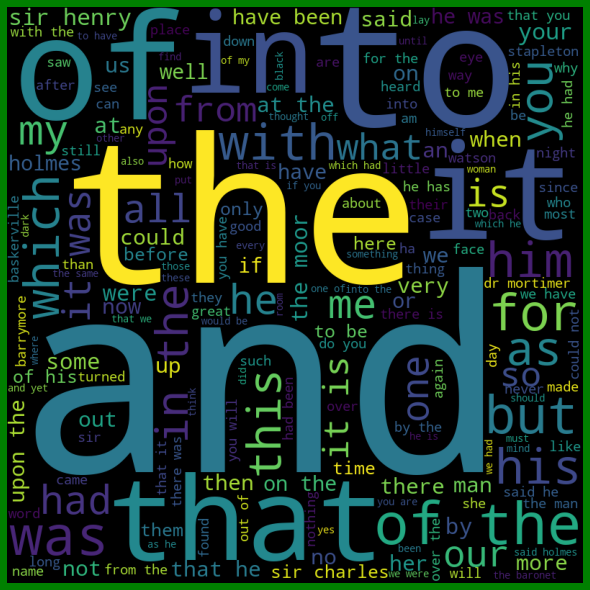

In [ ]:
plt.figure(figsize = (8, 8), facecolor = 'green') 
plt.imshow(wordcloud_t1) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

**T2's Word Cloud**

In [ ]:
comment_words_t2 = ''
for i in range(len(tokens_t2)): 
  tokens_t2[i] = tokens_t2[i].lower() 
      
comment_words_t2 += " ".join(tokens_t2)+" "

In [ ]:
wordcloud_t2 = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10 , stopwords={','}).generate(comment_words_t2)

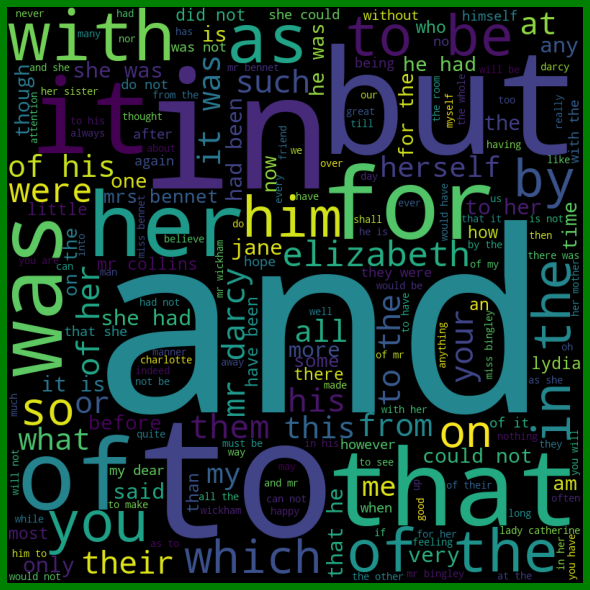

In [ ]:
plt.figure(figsize = (8, 8), facecolor = 'green') 
plt.imshow(wordcloud_t2) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 




> **Removing stopwords from T1 and T2 and generating Word Cloud for each again.**





In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')

**Word Cloud for T1 after removing stopwords.**

In [ ]:
wordcloud_sw_t1 = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = all_stopwords,
                min_font_size = 10 ,).generate(comment_words_t1) 
  

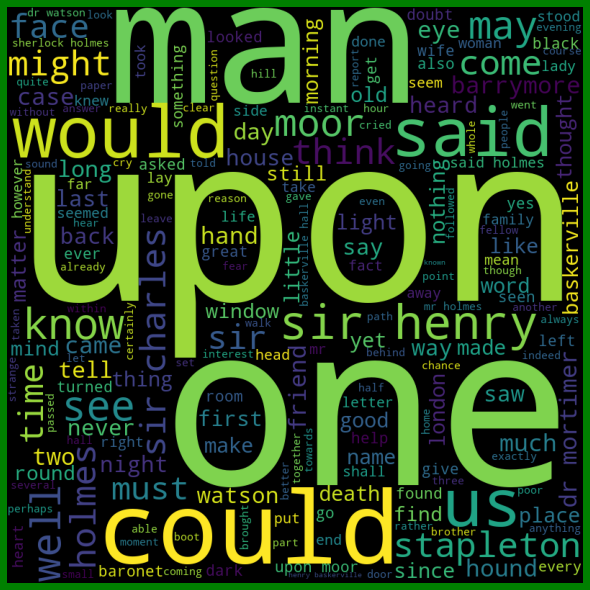

In [ ]:
plt.figure(figsize = (8, 8), facecolor = 'green') 
plt.imshow(wordcloud_sw_t1) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

**Word Cloud for T2 after removing stopwords.**

In [ ]:
wordcloud_sw_t2 = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = all_stopwords,
                min_font_size = 10 ,).generate(comment_words_t2) 

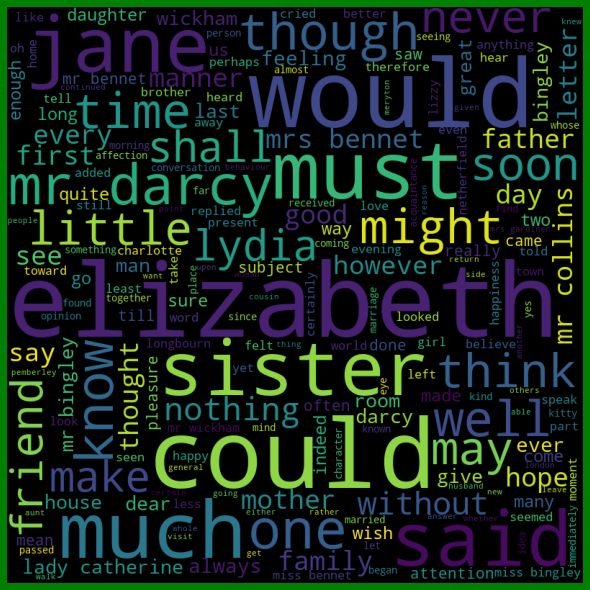

In [ ]:
plt.figure(figsize = (8, 8), facecolor = 'green') 
plt.imshow(wordcloud_sw_t2) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [ ]:
wordlen_freq_t1 = {}
for item in tokens_t1:
  length = len(item)
  if(length == 18):
    print("18 length word : " + str(item))
  if(length == 23):
    print("23 length word : " + str(item))

  if length in wordlen_freq_t1:
    wordlen_freq_t1[length] = wordlen_freq_t1[length] + 1
  else:
    wordlen_freq_t1[length] = 1


18 length word : remarkable-looking
23 length word : self-respect—everything
18 length word : questioning—stared
18 length word : ill-treatment—that


In [ ]:
print(wordlen_freq_t1)

{3: 14193, 8: 2004, 6: 4441, 1: 13017, 7: 3523, 4: 11495, 2: 10919, 5: 6411, 10: 842, 9: 1524, 14: 49, 13: 122, 12: 256, 15: 18, 11: 512, 16: 12, 22: 1, 20: 1, 18: 3, 17: 2, 23: 1, 21: 1}


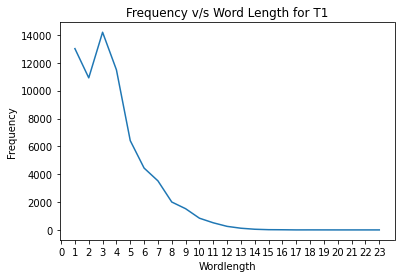

In [ ]:
lists_t1 = sorted(wordlen_freq_t1.items())
x1,y1=zip(*lists_t1)
plt.plot(x1,y1)
plt.xticks(range(0,24))
plt.rcParams["figure.figsize"] = (10,5)
plt.xlabel("Wordlength")
plt.ylabel("Frequency")
plt.title("Frequency v/s Word Length for T1")
plt.show()

In [ ]:
wordlen_freq_t2 = {}
for item in tokens_t2:
  length = len(item)
  if(length == 24):
    print("24 length word : " + str(item))
  if(length == 27):
    print("27 length word : " + str(item))

  if length in wordlen_freq_t2:
    wordlen_freq_t2[length] = wordlen_freq_t2[length] + 1
  else:
    wordlen_freq_t2[length] = 1


24 length word : impartiality—deliberated
27 length word : inconveniences—cheerfulness


In [ ]:
print(wordlen_freq_t2)

{2: 22378, 1: 24787, 5: 11858, 11: 1432, 12: 868, 4: 21982, 6: 8975, 3: 28645, 10: 2385, 7: 8367, 8: 5062, 13: 448, 9: 4967, 14: 136, 15: 64, 16: 25, 17: 12, 18: 4, 22: 2, 20: 2, 19: 2, 24: 1, 27: 1}


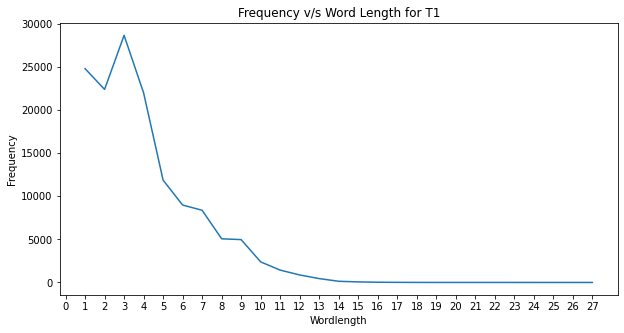

In [ ]:
lists_t2 = sorted(wordlen_freq_t2.items())
x2,y2=zip(*lists_t2)
plt.plot(x2,y2)
plt.rcParams["figure.figsize"] = (10,5)
plt.xticks(range(0,28))
plt.xlabel("Wordlength")
plt.ylabel("Frequency")
plt.title("Frequency v/s Word Length for T1")
plt.show()

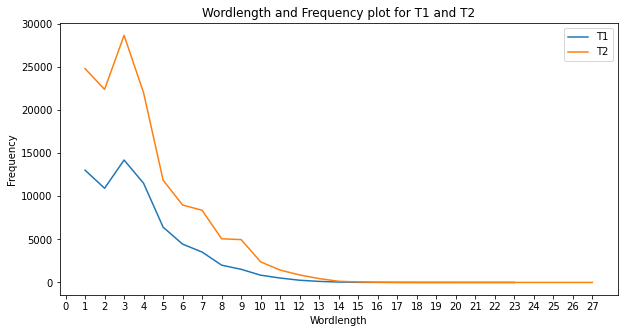

In [ ]:
plt.plot(x1, y1, label = "T1")
# plotting the line 2 points 
plt.plot(x2, y2, label = "T2")
plt.xlabel('Wordlength')
# Set the y axis label of the current axis.
plt.ylabel('Frequency')
plt.title('Wordlength and Frequency plot for T1 and T2')
plt.legend()
plt.rcParams["figure.figsize"] = (10,5)
plt.xticks(range(0,28))
plt.show()



> **PoS Tagging**



In [ ]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

**For T1**


In [ ]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
nltk_data1 = pos_tag(tokens_t1)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
for i in nltk_data1[:]:
  print(i)

**For T2**

In [ ]:
nltk_data2 = pos_tag(tokens_t2)

In [ ]:
for i in nltk_data2[:]:
  print(i)